# Ford Bike Trips Dataset - (2/2019)
## by Belal Abdelnasser

## Investigation Overview

>- When are most trips taken in terms of time of day and day of the week?
>- How long does the average trip take?
>- Does the above depend on if a user is a subscriber or customer?
>- What is Bike Sharing segemnt out of all users?
>- Subscribers to Customers ratio?
>- When are most trips duration in terms of time of day and day of the week?
>- Does the trips duration depend on if a user is a subscriber or customer?
## Dataset Overview

> This Dataset is for Ford Bikes and contain information about trips in Feb 2019. The structure of data is as follows:
> - duration_sec
> - start_time                |   183412 non-null  object
> - end_time                  |   183412 non-null  object 
> - start_station_id          |   183215 non-null  float64
> - start_station_name        |   183215 non-null  object 
> - start_station_latitude    |   183412 non-null  float64
> - start_station_longitude   |   183412 non-null  float64
> - end_station_id            |   183215 non-null  float64
> - end_station_name          |   183215 non-null  object  
> - end_station_latitude      |   183412 non-null  float64
> - end_station_longitude     |   183412 non-null  float64
> - bike_id                   |   183412 non-null  int64  
> - user_type                 |   183412 non-null  object 
> - member_birth_year         |   175147 non-null  float64
> - member_gender             |   175147 non-null  object 
> - bike_share_for_all_trip   |   183412 non-null  object 
> dtypes: float64(7), int64(2), object(7)

In [30]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [31]:
# load in the dataset into a pandas dataframe
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [32]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [33]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [34]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df['start_station_id'] = df['start_station_id'].astype(str)
df['end_station_id'] = df['end_station_id'].astype(str)
df['bike_id'] = df['bike_id'].astype(str)
df['user_type'] = df['user_type'].astype('category')

In [35]:
df['month'] = df.start_time.dt.month
df['weekday'] = df.start_time.dt.weekday
df['hour'] = df.start_time.dt.hour
df['Trip'] = df.start_station_name  + df.end_station_name
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,weekday,hour,Trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2,3,17,Montgomery St BART Station (Market St at 2nd S...
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,2,3,18,The Embarcadero at Steuart StBerry St at 4th St
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2,3,12,Market St at Dolores StPowell St BART Station ...
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2,3,17,Grove St at Masonic AveCentral Ave at Fell St
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2,3,23,Frank H Ogawa Plaza10th Ave at E 15th St


### We Need Some Data Wrangling Steps.
- Change start_time and end_time column data type to datetime
- Convert duration_sec to duration_hour
- Change user_type from str to category
- Change ids columns to str
- Drop NANs

In [36]:
df.dropna(inplace=True)

In [37]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df['start_station_id'] = df['start_station_id'].astype(str)
df['end_station_id'] = df['end_station_id'].astype(str)
df['bike_id'] = df['bike_id'].astype(str)
df['user_type'] = df['user_type'].astype('category')

## Univariant Visuals

### Subscribers to Customers ratio.
>- It's obvious that the Subscriber type is much more than Customer Type

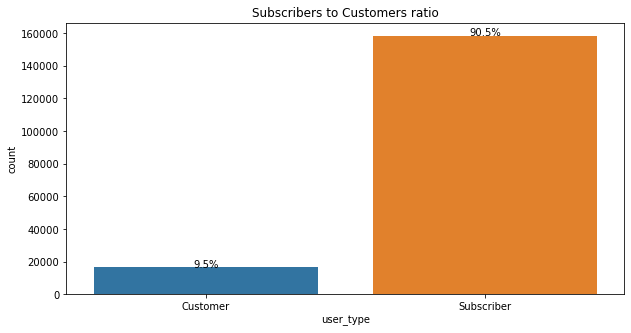

In [38]:
plt.figure(figsize=(10,5))
sb.countplot(data=df,x='user_type')
plt.title('Subscribers to Customers ratio')
type_counts = df['user_type'].value_counts()
locs, labels = plt.xticks()
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/df.shape[0])
    plt.text(loc, count+5, pct_string, ha = 'center', color = 'black')

### Bike sharing Trips Vs Non-sharing
>- Bike Sharing all the trip is signficanlly small compared to Non-shared Trips 

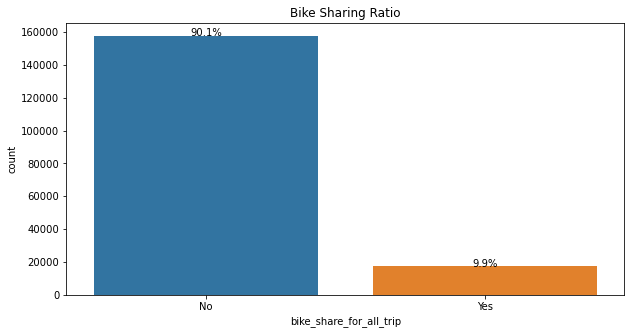

In [39]:
plt.figure(figsize=(10,5))
sb.countplot(data=df,x='bike_share_for_all_trip')
type_counts = df['bike_share_for_all_trip'].value_counts()
locs, labels = plt.xticks()
plt.title('Bike Sharing Ratio')
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/df.shape[0])
    plt.text(loc, count, pct_string, ha = 'center', color = 'black')

 ### Duration disribution.
>- Distribution of trips duration is Right skewed with mean equal 704.
>- There are alot of outliers

Text(0, 0.5, 'Number Of Trips')

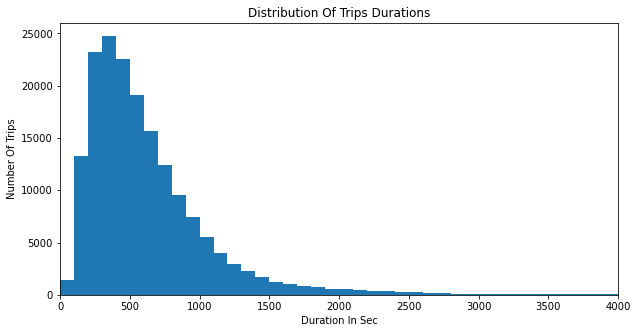

In [40]:
plt.figure(figsize=(10,5))
plt.hist(data=df,x='duration_sec',bins=np.arange(0,df.duration_sec.max()+100,100))
plt.xlim((0,4000))
plt.title('Distribution Of Trips Durations')
plt.xlabel('Duration In Sec')
plt.ylabel('Number Of Trips')

> ### Feature Engineering 
> We need to do some transformations.
>- Create (Age) new feature from birth data column
>- Create month, weekday, hour and trip columns from start_time column.

### Relative frequency of trips per day and per hour

> - Bike Trips increase in Weekdays and decrease in weekends
> - Most trips are between 7:00 AM and 8:00 PM

Text(0, 0.5, 'Trips')

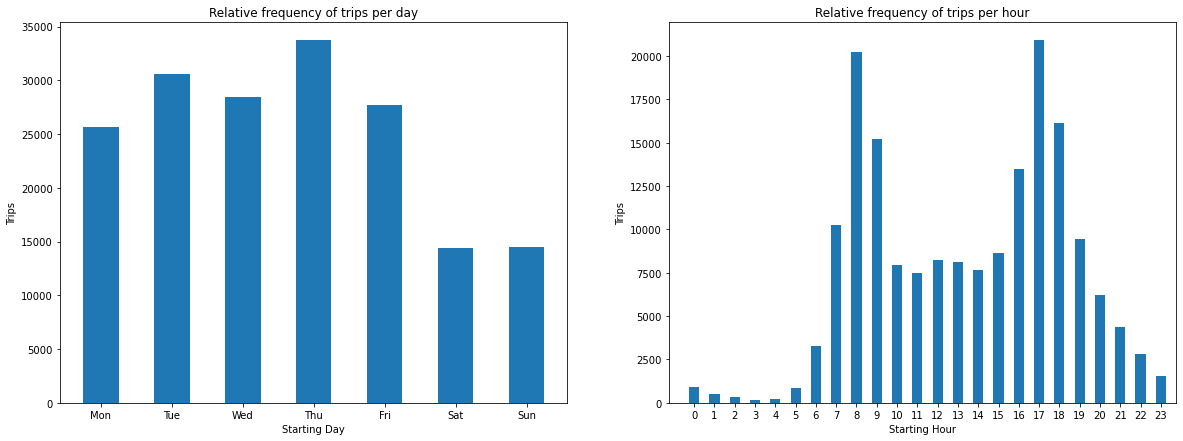

In [41]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.hist(data=df,x='weekday',bins=np.arange(0,df.weekday.max()+1,0.5))
plt.xticks(ticks=[0.25,1.25,2.25,3.25,4.25,5.25,6.25],labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.title('Relative frequency of trips per day')
plt.xlabel('Starting Day')
plt.ylabel('Trips')
plt.subplot(1,2,2)
plt.hist(data=df,x='hour',bins=np.arange(0,df.hour.max()+1,0.5))
plt.xticks(ticks=[0.25,1.25,2.25,3.25,4.25,5.25,6.25,7.25,8.25,9.25,10.25,11.25,12.25,13.25,14.25,15.25,16.25,
17.25,18.25,19.25,20.25,21.25,22.25,23.25],labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.xlim((-1,24))
plt.title('Relative frequency of trips per hour')
plt.xlabel('Starting Hour')
plt.ylabel('Trips')

### Univariant Insights Summary
>- 90.5% subscribers and 9.5% customers.
>- Thursday have te most taken trips.
>- 90.1% Sharing - 9.9 % Non-sharing
>- 5:00 AM is the most starting hour of trips.
>- Age distribution shows that there is outliers. This the only unusual point in all valriables of interest.
>- Duration distribution also have many extreme values but I can't decide it is outliers or not becuase I don't have domain knowledge.
>- Create month, weekday, hour and trip columns from start_time column To find out When are most trips taken in terms of time of day, day of the week.
>- Create (Age) new feature from birth data column

## Bivariate Exploration

## Insights - Daily Trips per user type
>- As expected number of trips taken by Subscribers is much more than Customers for daily basis as well as hourly basis. 

Text(0.5, 1.0, 'Daily Trips per user type')

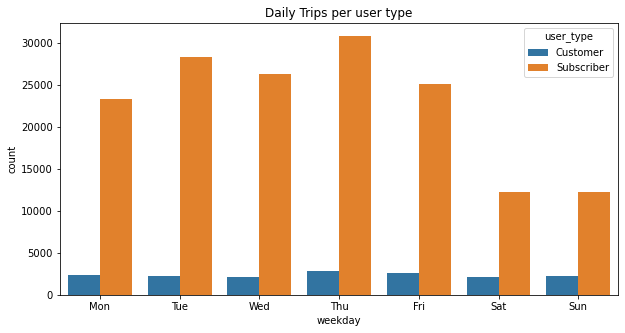

In [42]:
plt.figure(figsize=(10,5))
days=[0,1,2,3,4,5,6]
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=days)
df['weekday'] = df['weekday'].astype(vclasses)
sb.countplot(data = df, x = 'weekday', hue = 'user_type')
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.title('Daily Trips per user type')

## Insights - Hourly Trips per user type
> - We find from the plots that trips duration slightly change through different weekdays. The mean duration(sec) of trips is very close through weekdays.


Text(0.5, 1.0, 'Hourly Trips per user type')

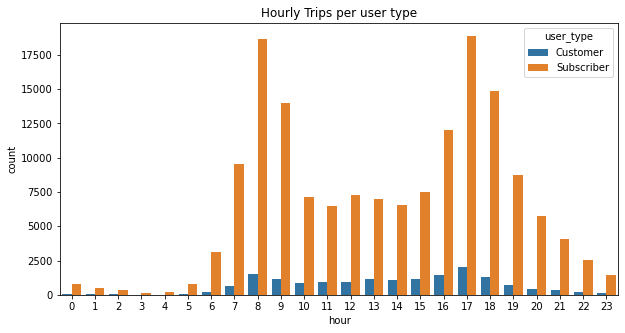

In [43]:
plt.figure(figsize=(10,5))
hour=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=hour)
df['hour'] = df['hour'].astype(vclasses)
sb.countplot(data = df, x = 'hour', hue = 'user_type')
plt.title('Hourly Trips per user type')

## Duration_sec Vs Weekday (Boxplot Plot,Violin Plot)
> - We find that the mean Duration of trips is very close to each other during hours of the day. But the largest mean of duration of trips versus hours of the day is at 8:00 AM and 5:00 PM


Text(0.5, 1.0, 'Boxplot Plot: Duration_sec Vs Weekday')

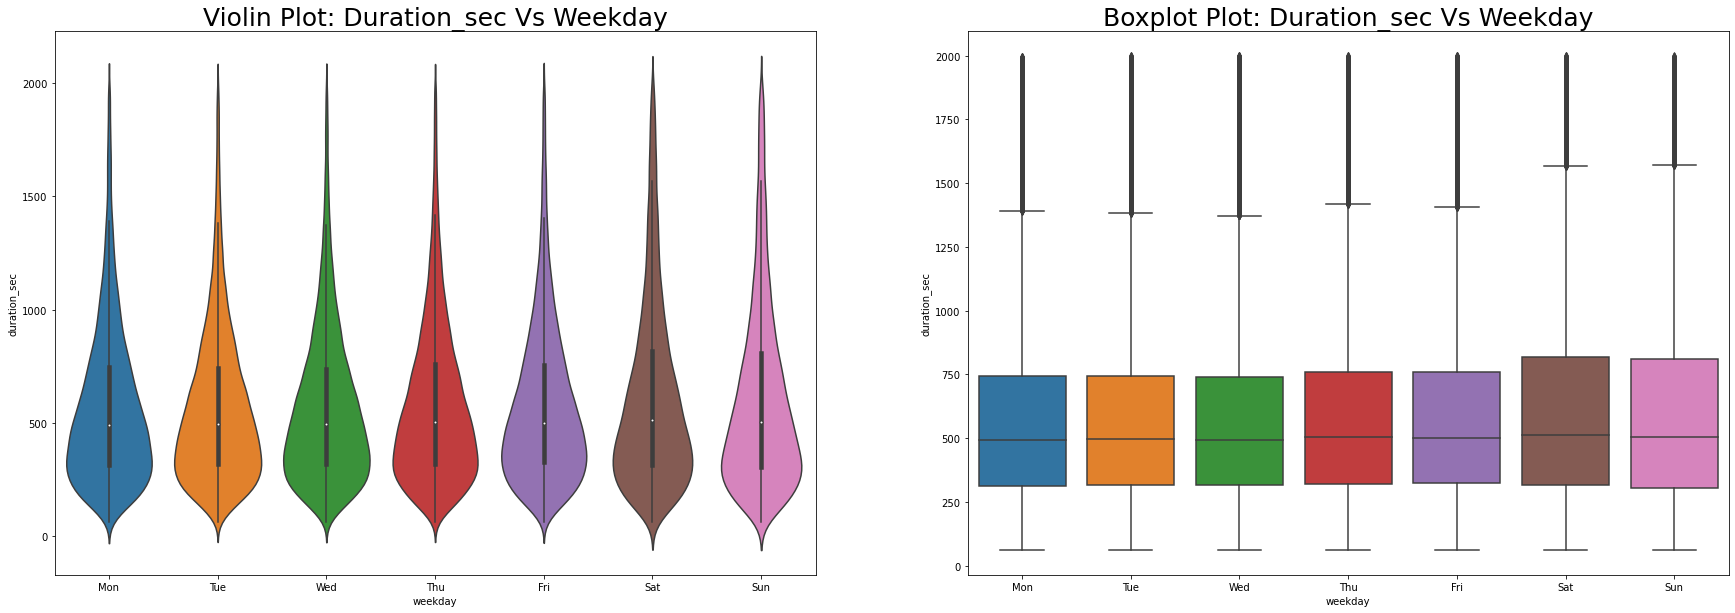

In [44]:
plt.figure(figsize=(30,10))
weekdays = [0,1,2,3,4,5,6]
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=weekdays)
plt.subplot(1,2,1)
sb.violinplot(data=df[df.duration_sec<2000], x='weekday', y='duration_sec')
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.title('Violin Plot: Duration_sec Vs Weekday',fontdict={'fontsize':25})
plt.subplot(1,2,2)
sb.boxplot(data=df[df.duration_sec<2000], x='weekday', y='duration_sec')
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.title('Boxplot Plot: Duration_sec Vs Weekday',fontdict={'fontsize':25})

### Bivariate Insights Summary
> ### 2-2019
> - We find from the plots that trips duration slightly change through different weekdays. The mean duration(sec) of trips is very close through weekdays.
> - We find that the mean Duration of trips is very close to each other during hours of the day. But the largest mean of duration of trips versus hours of the day is at 8:00 AM and 5:00 PM.
> - We find that most of users is subscribers regardless of gender. 
> - The rush hour of trips is before or after work hours which is pretty relevant becuase distribution of age of users shows that most of users is at work age (20:50 years old)
> - Almsot All od users are subscribers. 

## Multivariate Exploration

## User Type Effect On Trip Duration (weekdays)
> - Daily trips duration change slightly for subscribers.
> - For customers there are clear change in weekdays trips duration and the the most increase happened in weekends.

Text(0.5, 1.0, 'Barplot:User Type Effect On Trip Duration (weekdays)')

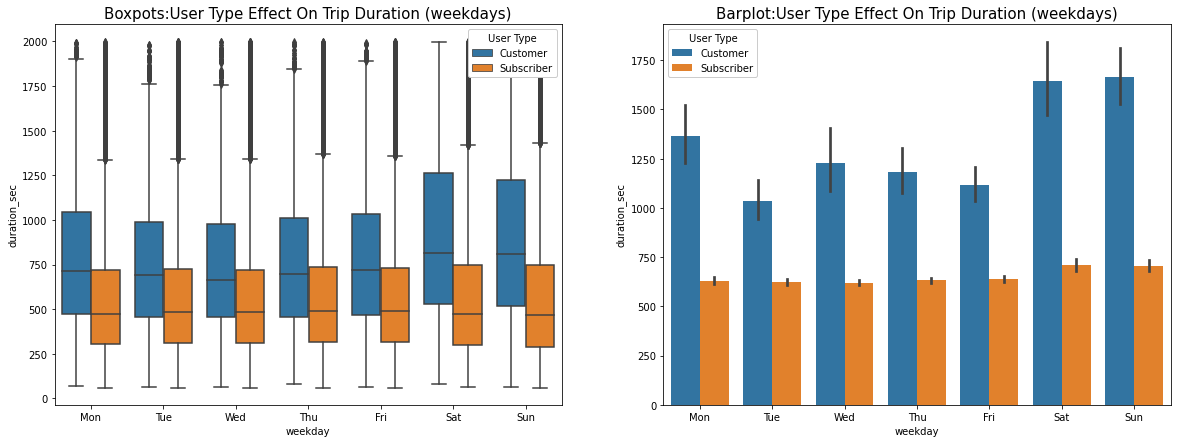

In [45]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sb.boxplot(data = df[df.duration_sec<2000] , x="weekday", y="duration_sec", hue="user_type")
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.title('Boxpots:User Type Effect On Trip Duration (weekdays)',fontdict={'fontsize':15})
plt.legend(loc = 'upper right', ncol = 1, framealpha = 1, title = 'User Type')
plt.subplot(1,2,2)
ax = sb.barplot(data = df, x = 'weekday', y = 'duration_sec', hue = 'user_type')
ax.legend(loc = 0, ncol = 1, framealpha = 1, title = 'User Type')
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.title('Barplot:User Type Effect On Trip Duration (weekdays)',fontdict={'fontsize':15})

> - For subscribers there are little change in Trips duration for each hour during the whole day. But for customers there significant change during day hours. As we can see at 3:00 AM is the biggest rise in Trips duration then comes 2:00 AM.

Text(0.5, 1.0, 'Boxplot:User Type Effect On Trip Duration (Hours)')

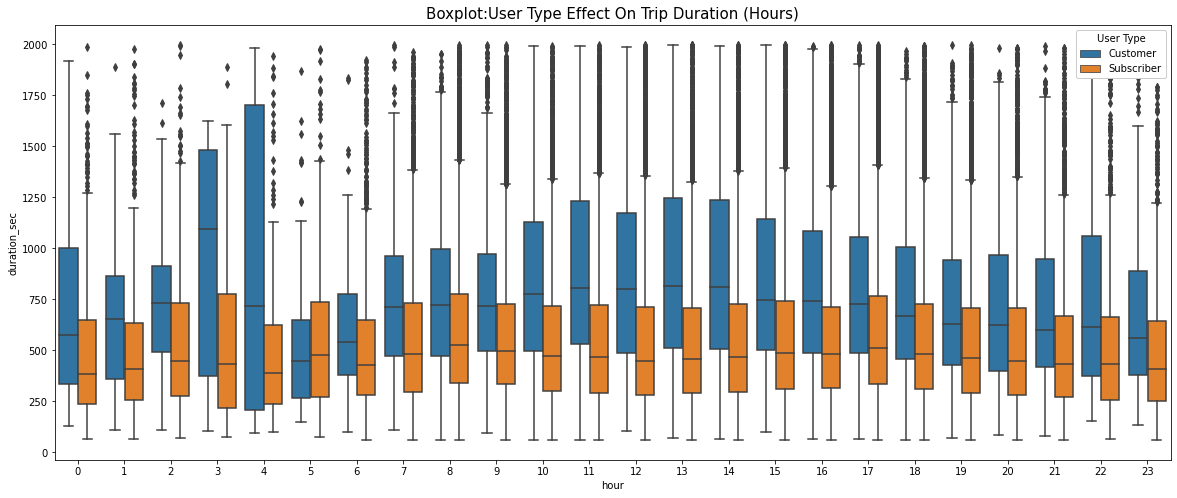

In [46]:
plt.figure(figsize=(20,8))
sb.boxplot(x="hour", y="duration_sec", hue="user_type",
                 data=df[df.duration_sec<2000])
plt.legend(loc = 'upper right', ncol = 1, framealpha = 1, title = 'User Type')
plt.title('Boxplot:User Type Effect On Trip Duration (Hours)',fontdict={'fontsize':15})

Text(0.5, 1.0, 'Barplot:User Type Effect On Trip Duration (Hours)')

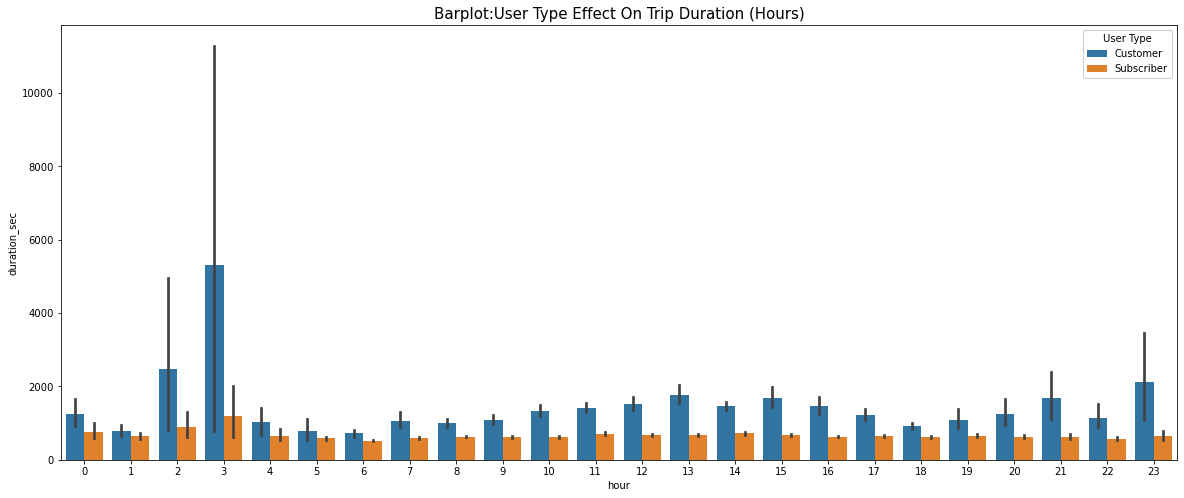

In [47]:
plt.figure(figsize=(20,8))
ax = sb.barplot(data = df, x = 'hour', y = 'duration_sec', hue = 'user_type')
ax.legend(loc = 'upper right', ncol = 1, framealpha = 1, title = 'User Type')
plt.title('Barplot:User Type Effect On Trip Duration (Hours)',fontdict={'fontsize':15})

## Multivariate Insights Summary
> ### 2-2019
> - Daily trips duration change slightly for subscribers.
> - For customers there are clear change in weekdays trips duration and the the most increase happened in weekends.
> - For subscribers there are little change in Trips duration for each hour during the whole day. But for customers there significant change during day hours. As we can see at 3:00 AM is the biggest rise in Trips duration then comes 2:00 AM.
> - In Weekly basis the largest Trips duration for customers is in weekends
> - In Weekly basis Customers make larger average Trips durations than subscribers.
> - In Weekly basis Subscribers make small regular trips duration (everyday)-there is no peek- but I think for long term plan(months).
> - In Hourly basis Customers .
> - In Hourly basis Subscribers make small regular trips duration but I think for long term plan. 

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!